# **던전앤파이터 활동 데이터 기반 고객 세분화 및 타겟팅 전략**

### **프로젝트 배경**

- 110Lv 시즌의 흥행 부진으로 인해 유저들이 대거 이탈하며 매출 감소의 위험성 증가.
  
- 핵심 BM인 패키지 및 패스 매출 향상을 위해 유저들에게 적합한 BM 제공의 필요성 대두.

### **프로젝트 목표**

- 머신러닝을 활용해 패키지 구매를 예측하여 안정적인 BM을 구축 및 수익 증대.
  
- 패키지 매출 예측 모델과 유저 데이터 분석을 통해 인사이트를 도출하고 고객을 분류하여 매출 개선에 기여.

### **데이터 수집**
- 던전앤파이터 공식 홈페이지를 통한 웹 크롤링으로 데이터를 수집한다.

- 웹 크롤링을 통해 얻은 데이터를 바탕으로 네오플 OpenAPI를 활용하여 추가 데이터를 수집한다.

### **분석 방법**
- 유저들의 캐릭터 데이터, 컨텐츠 클리어 데이터를 활용하여 데이터를 구성.
  
- 데이터를 바탕으로 XGBoost Classifier를 학습시켜 구매 예측 모델을 구축.
  
- 데이터를 바탕으로 K-Means 클러스터링하여 고객을 세분화.

### **프로젝트 결과**
- 84.6%의 높은 예측 정확도 달성

- 클러스터별 구매 패턴 파악을 통한 타겟팅 전략 수립

## **1. EDA**

### **1. 전체 캐릭터 탐색**

* 각 캐릭터의 서버, 캐릭터 코드, 모험단, 직업군, 직업, 명성 정보를 가져온다.

* 캐릭터 수, 유저 수 등을 파악한다.

In [1]:
# from configs.mysql_config import MYSQL_CONNECTION_STRING
# from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('seaborn-v0_8')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# engine = create_engine(MYSQL_CONNECTION_STRING)

# %load_ext sql
# %sql {MYSQL_CONNECTION_STRING}

In [2]:
df_character = pd.read_csv('./data/01_df_character.csv')
print(f'전체 캐릭터 수 : {len(df_character):,}개')
df_character.head()

전체 캐릭터 수 : 1,616,194개


,sv_kor,sv_eng,char_code,char_name,char_name_encoded,char_img,job_group,job_name,lv,fame,adventure
0,안톤,anton,103e5c925e8a698e89abd4d68cce1d0e,스팅거타이거,%EC%8A%A4%ED%8C%85%EA%B1%B0%ED%83%80%EC%9D%B4%...,954127a4d7abe7898a7777bebd2cdb0d,거너(남),남런처,110,67972,천계특수화기부대
1,디레지에,diregie,19d8117225b44236412c9e8f865097fe,제로로,%EC%A0%9C%EB%A1%9C%EB%A1%9C,2f03a42e6f4619b3508d3ee7a69c633f,거너(남),남런처,110,67941,쁘띠로로
2,카시야스,casillas,0687f6c88b92b94c49e3b170d70e8c26,인남님,%EC%9D%B8%EB%82%A8%EB%8B%98,6b65ceea11eff6311d47dc05ceed8183,거너(남),남런처,110,67898,인남그룹
3,카시야스,casillas,649387bb5c95146716d7c57fab81ccd3,무키리,%EB%AC%B4%ED%82%A4%EB%A6%AC,cb78cd7b0d058866202740adee9e0f58,거너(남),남런처,110,67761,유부남런처
4,카인,cain,e1e9e41c96ed6ab3bcd1fa1101978c9b,작은로망하나,%EC%9E%91%EC%9D%80%EB%A1%9C%EB%A7%9D%ED%95%98%...,c92220afd560e00fb6290123d2a1491e,거너(남),남런처,110,67703,작은로망


In [3]:
df_character.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616194 entries, 0 to 1616193
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   sv_kor             1616194 non-null  object
 1   sv_eng             1616194 non-null  object
 2   char_code          1616116 non-null  object
 3   char_name          1616193 non-null  object
 4   char_name_encoded  1616193 non-null  object
 5   char_img           1616194 non-null  object
 6   job_group          1616194 non-null  object
 7   job_name           1616194 non-null  object
 8   lv                 1616194 non-null  int64 
 9   fame               1616194 non-null  int64 
 10  adventure          1615996 non-null  object
dtypes: int64(2), object(9)
memory usage: 135.6+ MB


In [4]:
df_character.isnull().sum()

sv_kor                 0
sv_eng                 0
char_code             78
char_name              1
char_name_encoded      1
char_img               0
job_group              0
job_name               0
lv                     0
fame                   0
adventure            198
dtype: int64

#### **캐릭터 명성 분포**

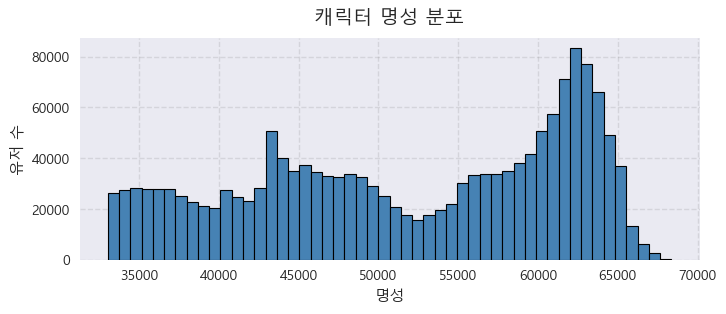

In [5]:
fig,ax = plt.subplots(figsize=(8,3))
sns.histplot(
    data=df_character, x='fame', bins=50,
    multiple='stack', color='steelblue', alpha=1,
    shrink=1, edgecolor='black', linewidth=0.8)
ax.set_title('캐릭터 명성 분포', fontsize=14, pad=10)
ax.set_xlabel('명성')
ax.set_ylabel('유저 수')
ax.grid(True, alpha=0.2, color='gray', linestyle='--')
plt.subplots_adjust(top=0.85)
plt.show()

* 시즌이 지남에 따라 명성 5만 이하의 캐릭터들은 휴면 캐릭터로 생각한다.

* 기존 이벤트 명성이자 레기온 컨텐츠 어둑섬의 입장 명성인 50248을 기준으로 필터링 후 탐색한다.

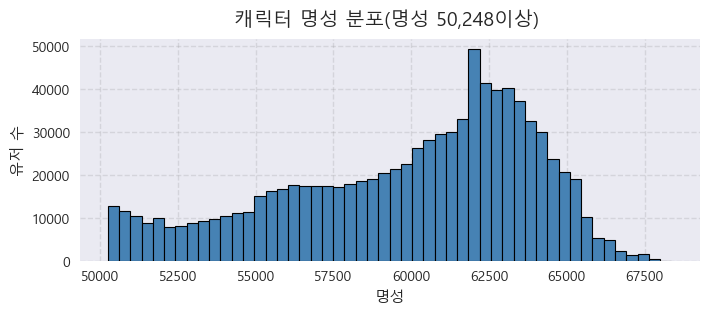

In [6]:
fig,ax = plt.subplots(figsize=(8,3))

threshold = 50248
sns.histplot(
    data=df_character[df_character['fame']>=threshold], x='fame', bins=50,
    multiple='stack', color='steelblue', alpha=1,
    shrink=1, edgecolor='black', linewidth=0.8)
ax.set_title(f'캐릭터 명성 분포(명성 {threshold:,}이상) ', fontsize=14, pad=10)
ax.set_xlabel('명성')
ax.set_ylabel('유저 수')
ax.grid(True, alpha=0.2, color='gray', linestyle='--')
plt.subplots_adjust(top=0.85)
plt.show()

* 휴면 캐릭터들을 제외했으니, 캐릭터 수에 따른 유저 분포를 확인한다.

#### **캐릭터 수에 따른 유저 분포**

전체 유저 수 : 123,063명


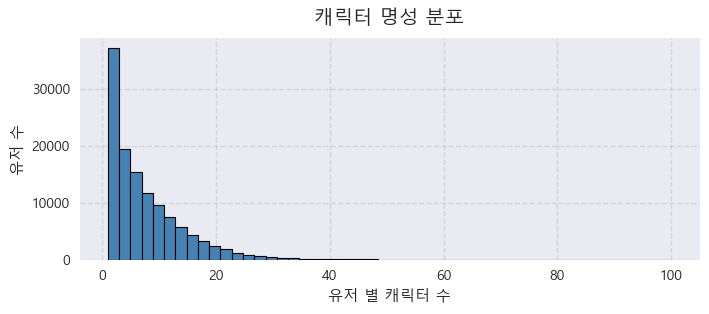

In [7]:
df_character_adventure_grouped = df_character[(df_character['adventure'].notnull()) &
                                              (df_character['fame']>=50248)].groupby('adventure').agg(
    count = ('adventure','size'),
    fame_max = ('fame','max')
)
print(f'전체 유저 수 : {len(df_character_adventure_grouped):,}명')

fig,ax = plt.subplots(figsize=(8,3))

sns.histplot(data=df_character_adventure_grouped, x='count', bins=50,
             multiple='stack', color='steelblue', alpha=1,
             shrink=1, edgecolor='black', linewidth=0.8)
ax.set_title('캐릭터 명성 분포', fontsize=14, pad=10)
ax.set_xlabel('유저 별 캐릭터 수')
ax.set_ylabel('유저 수')
ax.grid(True, alpha=0.2, color='gray', linestyle='--')

plt.subplots_adjust(top=0.85)
plt.show()

* 거의 모든 유저들이 25개 이하의 캐릭터를 보유하고 있다.

#### **캐릭터 개수, 명성 산점도**

Text(0.5, 1.02, '캐릭터 수와 명성 Joint Plot')

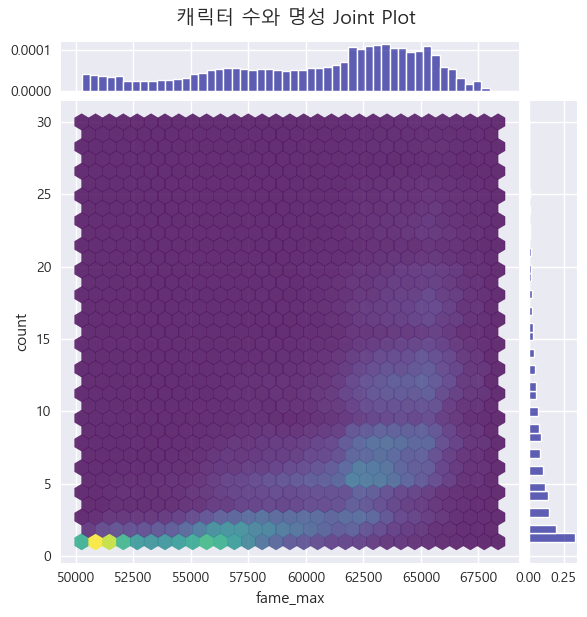

In [8]:
jp = sns.jointplot(
    data=df_character_adventure_grouped[df_character_adventure_grouped['count'] <= 30],
    x='fame_max', y='count',
    kind='hex', cmap='viridis', alpha=0.8,
    height=6, ratio=8, space=0.2,
    joint_kws={'gridsize': 30, 'mincnt': None, 'marginals': False},
    marginal_ticks=True,
    marginal_kws={'bins': 50, 'color': 'darkblue', 'alpha': 0.6,
                  'edgecolor': 'white', 'linewidth': 1, 'stat': 'density'}
)

jp.fig.suptitle('캐릭터 수와 명성 Joint Plot', y=1.02, fontsize=14)

* 대부분의 유저들이 10개 이하의 캐릭터를 육성하고 있다.

* 또한, 2차적으로 명성 필터링을 할 경우 57,500~60,000 구간을 커트라인으로 잡는 것이 적당해보인다.

* 가장 최근에 이탈한 캐릭터를 잠재 고객으로 설정하기 위해 그대로 50,248로 설정한다.

#### **직업군 인구 수**

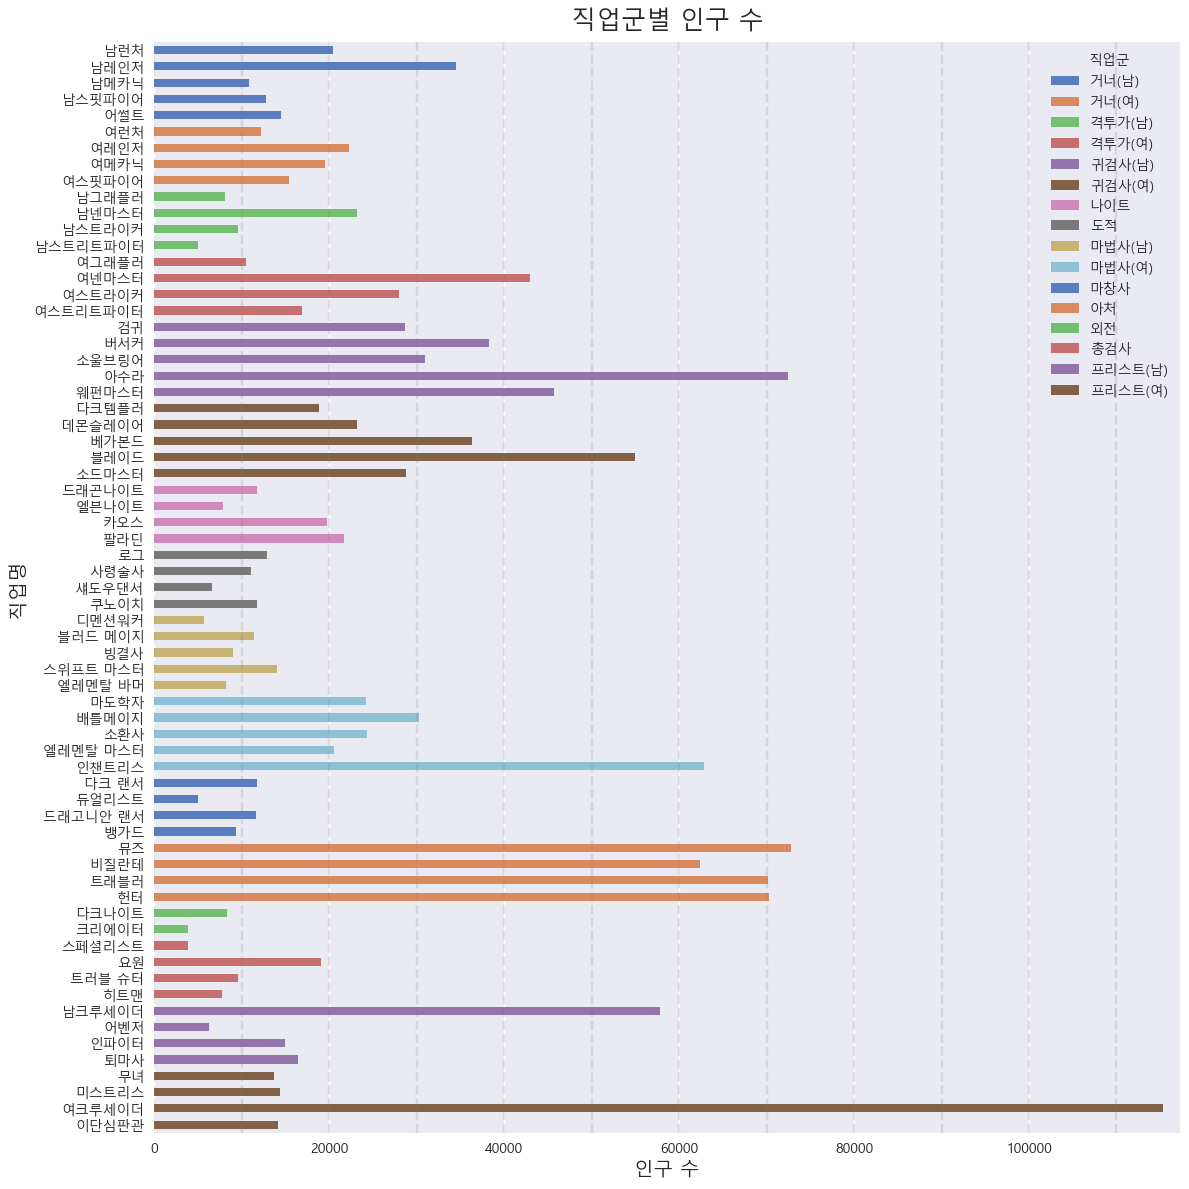

In [9]:
character_job_grouped = df_character.groupby(['job_group','job_name']).agg(
    count = ('job_name','size')
).reset_index()

plt.figure(figsize=(12,12))
for i in range(0, int(character_job_grouped['count'].max() + 2000), 10000):
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.2)
sns.barplot(data=character_job_grouped, y='job_name', x='count', hue='job_group', width=0.5, palette='muted')

plt.title('직업군별 인구 수', fontsize=18, pad=10)
plt.xlabel('인구 수', fontsize=14)
plt.ylabel('직업명', fontsize=14)
plt.xlim([0, character_job_grouped['count'].max() + 2000])
plt.legend(title='직업군', loc='upper right')
plt.tight_layout()
plt.show()

* 아처 직업군 모두 직업 인구 순위의 상위권에 속하는 것을 확인할 수 있다.

* 현재 Active User 중 대부분은 이벤트를 참여하며 육성했을 것으로 예상된다.

#### **요약**
* 휴면 유저가 많이 분포하는 명성대를 50,248로 설정한다.

* 유저의 대부분이 신규 캐릭터 생성 및 참여 이벤트를 진행했다.

### **2. 신규 캐릭터 탐색**

In [10]:
df_new_character = pd.read_csv('./data/02_df_new_character.csv')
print(f'전체 캐릭터 수 : {len(df_new_character):,}개')
df_new_character.tail()

전체 캐릭터 수 : 132,618개


,sv_kor,sv_eng,char_code,char_name,char_name_encoded,char_img,job_group,job_name,lv,fame,adventure,title,buy_package,clear_event
132613,카시야스,casillas,6791b1e33f74df905acdb4799bb59648,설월란,%EC%84%A4%EC%9B%94%EB%9E%80,b6561214facf623bdc1f72388eac565e,아처,비질란테,110,33047,발만웨,NaN,NaN,False
132614,카인,cain,97c5550ab53b3357cb5479e07f7a7ae6,NCET,NCET,44f90e8be4856f4375f9aa5b88acdb5a,아처,비질란테,110,33046,영양소TV,상상의 나래,False,False
132615,디레지에,diregie,fd2a3a805ed40ff35d40076d168552ac,고재킴,%EA%B3%A0%EC%9E%AC%ED%82%B4,1e572366266476fc22b872973136cf70,아처,비질란테,110,33044,고재단,NaN,NaN,False
132616,카시야스,casillas,be17ea04c2dfc093c62542b8e7a6c5cc,미크로스,%EB%AF%B8%ED%81%AC%EB%A1%9C%EC%8A%A4,a9a3be6e16dda18d7cd8ed43c57e986b,아처,비질란테,110,33043,poohrobin,상상의 나래,False,False
132617,시로코,siroco,46090e44c237fd51847a13d7fa660409,브람마,%EB%B8%8C%EB%9E%8C%EB%A7%88,8cde026d23e6509a68247680e417ce8b,아처,비질란테,110,33043,404ERS,NaN,NaN,False


#### **신규 캐릭터 명성 분포**

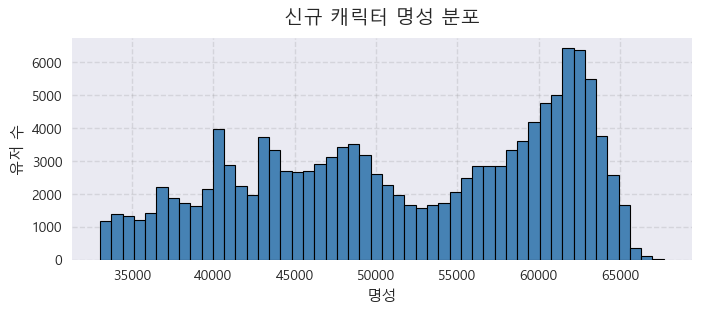

In [11]:
fig,ax = plt.subplots(figsize=(8,3))
sns.histplot(data=df_new_character, x='fame', bins=50,
             multiple='stack', alpha=1, color='steelblue',
             shrink=1, edgecolor='black', linewidth=0.8)
ax.set_title('신규 캐릭터 명성 분포', fontsize=14, pad=10)
ax.set_xlabel('명성')
ax.set_ylabel('유저 수')
ax.grid(True, alpha=0.2, color='gray', linestyle='--')
plt.subplots_adjust(top=0.85)
plt.show()

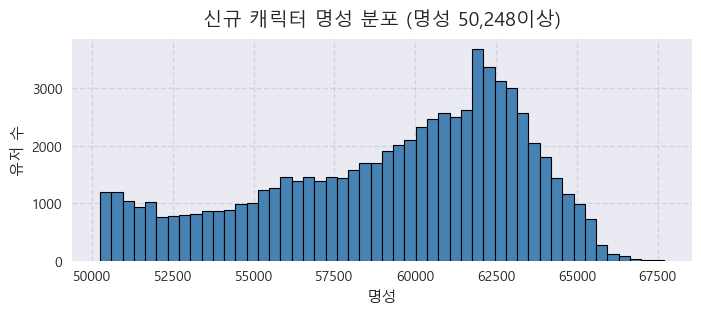

In [12]:
fig,ax = plt.subplots(figsize=(8,3))
sns.histplot(data=df_new_character[df_new_character['fame']>=threshold], x='fame', bins=50,
             multiple='stack', alpha=1, color='steelblue',
             shrink=1, edgecolor='black', linewidth=0.8)
ax.set_title(f'신규 캐릭터 명성 분포 (명성 {threshold:,}이상)', fontsize=14, pad=10)
ax.set_xlabel('명성')
ax.set_ylabel('유저 수')
ax.grid(True, alpha=0.2, color='gray', linestyle='--')
plt.subplots_adjust(top=0.85)
plt.show()

#### **유저 별 신규 캐릭터 수 비율**

전체 유저 수 : 84,366명


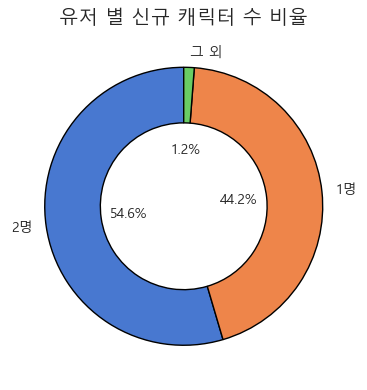

In [13]:
grouped_new_character = df_new_character.groupby('adventure').agg(
    count = ('char_code','size')
).reset_index()

print(f'전체 유저 수 : {len(grouped_new_character):,}명')

# 1명, 2명, 그 외로 나누기
grouped_new_character['count_group'] = grouped_new_character['count'].apply(lambda x: '1명' if x == 1 else ('2명' if x == 2 else '그 외'))
count_grouped = grouped_new_character['count_group'].value_counts(normalize=True).reset_index()
count_grouped.columns = ['count_group', 'percentage']
count_grouped['percentage'] = count_grouped['percentage'] * 100
order = count_grouped['count_group'].value_counts().index.tolist()

plt.figure(figsize=(4,4))
plt.pie(count_grouped['percentage'], labels=count_grouped['count_group'], 
        autopct='%1.1f%%', pctdistance=0.4, startangle=90,
        colors=sns.color_palette('muted', len(count_grouped)),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'width': 0.4})

plt.title('유저 별 신규 캐릭터 수 비율', fontsize=14)
plt.tight_layout()
plt.show()

#### **요약**

* 표본은 이스핀즈 명성인 33043 이상인 데이터를 수집했다.

* 전체 캐릭터는 약 160만, 전체 유저 수는 약 19만 명이다.

* 신규 캐릭터는 약 13만, 신규 캐릭터를 육성한 약 8.4만 명이다.

* 최근, 명성 50000 이상의 데이터에 성장 지원 이벤트를 진행했다.
  
* 이러한 점에서 명성 33043 이상인 유저보다 신규 캐릭터를 육성한 8.4만명이 Active User에 가깝다고 생각할 수 있다.

* 전체 유저들 중 50% 이상의 유저가 두 캐릭터를 육성했고, 나머지 대부분의 유저가 1개의 캐릭터를 육성했다.

### **3. 패키지 구매 유무 조사하기**

#### **유저, 캐릭터 별 구매 비율**

패키지 구매 유저 수 : 24,520명
패키지 구매 캐릭터 수 : 32,215개


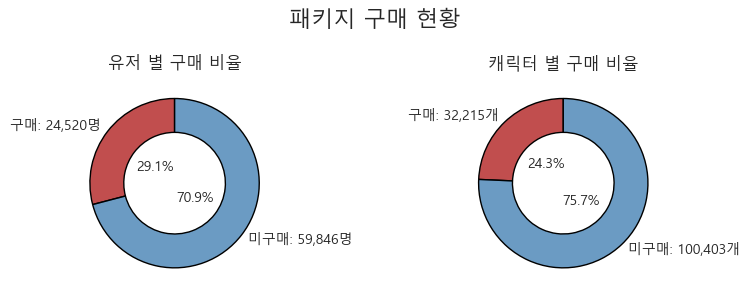

In [14]:
total_characters = df_new_character.shape[0]
total_users = df_new_character['adventure'].nunique()

buy_user_count = df_new_character[df_new_character['buy_package'] == True]['adventure'].nunique()
buy_character = df_new_character.groupby('buy_package').agg(
    count=('buy_package', 'size')
).reset_index()
buy_character_count = buy_character[buy_character['buy_package'] == True]['count'].values[0]

user_buy_ratio = buy_user_count / total_users * 100
character_buy_ratio = buy_character_count / total_characters * 100

print(f"패키지 구매 유저 수 : {buy_user_count:,}명")
print(f"패키지 구매 캐릭터 수 : {buy_character_count:,}개")

user_ratios = [user_buy_ratio, 100 - user_buy_ratio]
character_ratios = [character_buy_ratio, 100 - character_buy_ratio]
colors = [('steelblue',0.8),('firebrick',0.8)]

fig, ax = plt.subplots(1, 2, figsize=(8,3))
fig.suptitle('패키지 구매 현황', fontsize=16)

# 유저 별 구매 비율
labels = [f'구매: {buy_user_count:,}명', f"미구매: {df_new_character['adventure'].nunique()-buy_user_count:,}명"]
ax[0].pie(user_ratios, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors[::-1],
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'width': 0.4}, pctdistance=0.3)
ax[0].set_title('유저 별 구매 비율', fontsize=12)

# 캐릭터 별 구매 비율
labels = [f'구매: {buy_character_count:,}개', f"미구매: {len(df_new_character)-buy_character_count:,}개"]
ax[1].pie(character_ratios, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors[::-1],
          wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'width': 0.4}, pctdistance=0.3)
ax[1].set_title('캐릭터 별 구매 비율', fontsize=12)

plt.tight_layout()
plt.show()

* 약 29%의 유저가 구매를 하는 것으로 확인됐다.

* 캐릭터를 기준으로 약 24%의 캐릭터가 패키지를 구매했다.

패키지를 구매한 휴면 캐릭터 : 2,030개
패키지 구매 후 플레이하지 않은 유저 수 : 1,720명


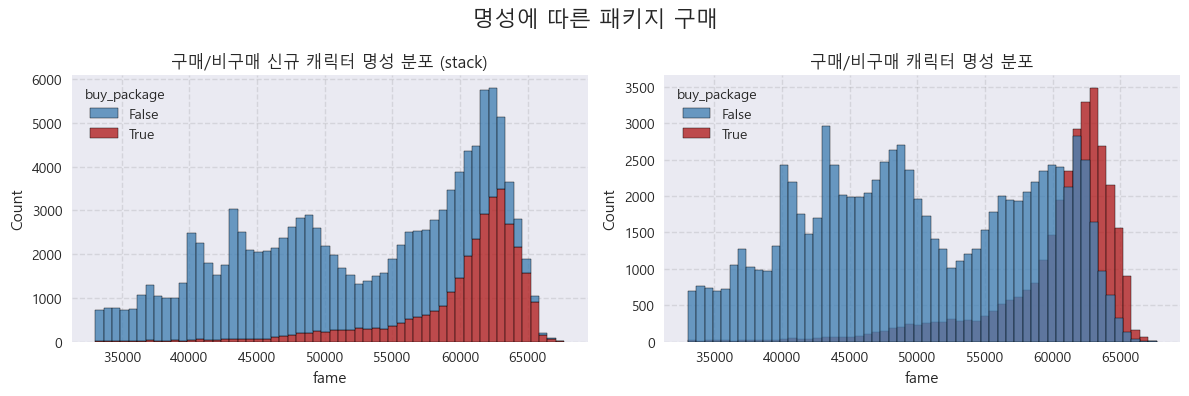

In [15]:
inactive_new_character = df_new_character[(df_new_character['fame']<=threshold)]
buy_inactive = inactive_new_character['buy_package']>0
print(f'패키지를 구매한 휴면 캐릭터 : {sum(buy_inactive):,}개')
print(f"패키지 구매 후 플레이하지 않은 유저 수 : {inactive_new_character[buy_inactive]['adventure'].nunique():,}명")

fig,ax = plt.subplots(1,2,figsize=(12,4))
fig.suptitle('명성에 따른 패키지 구매', fontsize=16)

sns.histplot(ax=ax[0], data=df_new_character, x='fame', hue='buy_package',multiple='stack',
             alpha=0.8, palette=colors)
ax[0].set_title('구매/비구매 신규 캐릭터 명성 분포 (stack)', fontsize=12)
ax[0].grid(True, alpha=0.2, color='gray', linestyle='--')

sns.histplot(ax=ax[1], data=df_new_character, x='fame', hue='buy_package',
             alpha=0.8, palette=colors)
ax[1].set_title('구매/비구매 캐릭터 명성 분포', fontsize=12)
ax[1].grid(True, alpha=0.2, color='gray', linestyle='--')

fig.tight_layout()
plt.show()

#### **요약**
- 전체 유저의 약 29%가 패키지를 구매했다.

- 전체 캐릭터의 약 24%가 패키지를 구매했다.

- 패키지를 구매한 휴면 캐릭터는 약 1.5%이다.

## **2. 학습 데이터 구성**

### **1. 메인 컨텐츠 클리어 데이터 수집**
* 신규 캐릭터 출시 이전의 최종 컨텐츠인 바칼 레이드(하드), 어둑섬 클리어 로그를 기반으로 데이터를 구성한다.

* 어둑섬 출시일 이후, 신규 캐릭터 출시 전 기간인 23-11-08 06:00 ~ 24-03-13 05:59내 로그를 탐색한다.

* 로그 데이터를 학습에 사용할 수 있도록 수치화 시킨다.

* 18주 동안 메인 컨텐츠 클리어 현황을 T/F로 나타내고 이동평균과 진법변환으로 점수를 매긴다.

* 18주간 데이터를 2진법으로 생각하고, 신규 캐릭터 출시일에 가까워질수록 자리수를 높인다.

In [16]:
df_character_score = pd.read_csv('./data/03_df_character_score.csv')
df_character_score.tail()

,sv_kor,sv_eng,char_code,char_name,char_name_encoded,char_img,job_group,job_name,lv,fame,adventure,raid_score,region_score,raid_clear_log,region_clear_log
1485840,카인,cain,3a128eb5bd9a42abb533185955f9c499,배럭공장,%EB%B0%B0%EB%9F%AD%EA%B3%B5%EC%9E%A5,4e66f54233cea292fff46615386c6df3,프리스트(여),여크루세이더,110,33048,나초,0.0,0.0,0.0,0.0
1485841,안톤,anton,5287dae6108c8334fa6049aef3c5f17d,교회큰누나,%EA%B5%90%ED%9A%8C%ED%81%B0%EB%88%84%EB%82%98,af3851987b4f2c71966dbc5955444307,프리스트(여),여크루세이더,110,33047,이웃사촌,0.0,0.0,0.0,0.0
1485842,카인,cain,4b48ace48095475af93cf2712248163c,마크-4,%EB%A7%88%ED%81%AC-4,0d413789f9c7d564532d8920a08ea411,프리스트(여),여크루세이더,110,33047,패배,0.0,0.0,0.0,0.0
1485843,시로코,siroco,033ab4fd8e35b84f7c931d3d1b37c4ef,진크루였던것,%EC%A7%84%ED%81%AC%EB%A3%A8%EC%98%80%EB%8D%98%...,1df9196c556fbec53a6e31765ede3b8e,프리스트(여),여크루세이더,110,33046,노닥거리는낙지,0.0,0.0,0.0,0.0
1485844,카인,cain,af11b4fa40797f3f63e1c901d0a313d3,크루름,%ED%81%AC%EB%A3%A8%EB%A6%84,b04cf229c1a10c99cc8ac2a8c53cf1a8,프리스트(여),여크루세이더,110,33046,벨베,0.0,0.0,0.0,0.0


#### **결측치 제거**

In [17]:
pd.DataFrame(df_character_score.isnull().sum()).T

,sv_kor,sv_eng,char_code,char_name,char_name_encoded,char_img,job_group,job_name,lv,fame,adventure,raid_score,region_score,raid_clear_log,region_clear_log
0,0,0,1404,1,1,0,0,0,0,0,1420,0,0,0,0


In [18]:
df_character_score.dropna(inplace=True)
pd.DataFrame(df_character_score.isnull().sum()).T

,sv_kor,sv_eng,char_code,char_name,char_name_encoded,char_img,job_group,job_name,lv,fame,adventure,raid_score,region_score,raid_clear_log,region_clear_log
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
count = 0
if count:
    grouped_x = df_character_score[(df_character_score['fame']>=threshold) & 
                            (~df_character_score['job_name'].isin(['헌터','비질란테']))].groupby('adventure').agg(
        count = ('adventure', 'size'),
        fame_avg = ('fame', 'mean'),
        fame_max = ('fame', 'max'),
        fame_min = ('fame', 'min'),
        raid_score_sum = ('raid_score', 'sum'),
        raid_score_sum_log2 = ('raid_score', lambda df: np.log1p(df.sum())),
        raid_score_avg = ('raid_score', 'mean'),
        raid_clear_sum = ('raid_clear_log', 'sum'),
        raid_clear_sum_log2 = ('raid_clear_log', lambda df: np.log1p(df.sum())),
        raid_clear_avg = ('raid_clear_log', 'mean'),
        region_score_sum = ('region_score', 'sum'),
        region_score_sum_log2 = ('region_score', lambda df: np.log1p(df.sum())),
        region_score_avg = ('region_score', 'mean'),
        region_clear_sum = ('region_clear_log', 'sum'),
        region_clear_sum_log2 = ('region_clear_log', lambda df: np.log1p(df.sum())),
        region_clear_avg = ('region_clear_log', 'mean')
    ).reset_index()

    # 신규 캐릭터
    grouped_y = df_new_character.groupby('adventure').agg(
        count = ('char_code','size'),
        buy = ('buy_package','sum'),
    ).reset_index()

    # 기존 캐릭터 정보, 신규 캐릭터 정보 JOIN
    joined = pd.merge(grouped_x, grouped_y, how='left', on='adventure')
    joined[['count_y', 'buy']] = joined[['count_y', 'buy']].fillna(0)
    joined['buy'] = joined['buy'].astype('bool').astype('int')
    joined.drop(['adventure'], axis=1, inplace=True)
joined = pd.read_csv('./data/04_raw_data.csv')
joined

,count_x,fame_avg,fame_max,fame_min,raid_score_sum,raid_score_sum_log2,raid_score_avg,raid_clear_sum,raid_clear_sum_log2,raid_clear_avg,region_score_sum,region_score_sum_log2,region_score_avg,region_clear_sum,region_clear_sum_log2,region_clear_avg,count_y,buy
0,9,56567.222222,58319,53477,46.00,3.850148,5.111111,668893.0,13.413381,74321.444444,5.50,1.871802,0.611111,376832.0,12.839557,41870.222222,0.0,0
1,1,56747.000000,56747,56747,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0
2,1,50308.000000,50308,50308,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0
3,10,59002.000000,64777,50544,23.00,3.178054,2.300000,1506816.0,14.225510,150681.600000,11.75,2.545531,1.175000,1145856.0,13.951663,114585.600000,0.0,0
4,5,59971.400000,61687,58371,14.25,2.724580,2.850000,970752.0,13.785827,194150.400000,2.00,1.098612,0.400000,491520.0,13.105260,98304.000000,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119620,30,61260.133333,64322,52150,342.50,5.839187,11.416667,6850495.0,15.739832,228349.833333,261.25,5.569298,8.708333,6389636.0,15.670188,212987.866667,2.0,1
119621,20,62115.850000,65069,55623,125.25,4.838264,6.262500,2915198.0,14.885449,145759.900000,163.00,5.099866,8.150000,3243989.0,14.992315,162199.450000,2.0,0
119622,10,60885.800000,64251,56115,68.00,4.234107,6.800000,1078201.0,13.890805,107820.100000,67.00,4.219508,6.700000,1177081.0,13.978549,117708.100000,2.0,0
119623,1,53789.000000,53789,53789,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0


### **2. 데이터 전처리**

#### **변수 별 상관관계 확인**

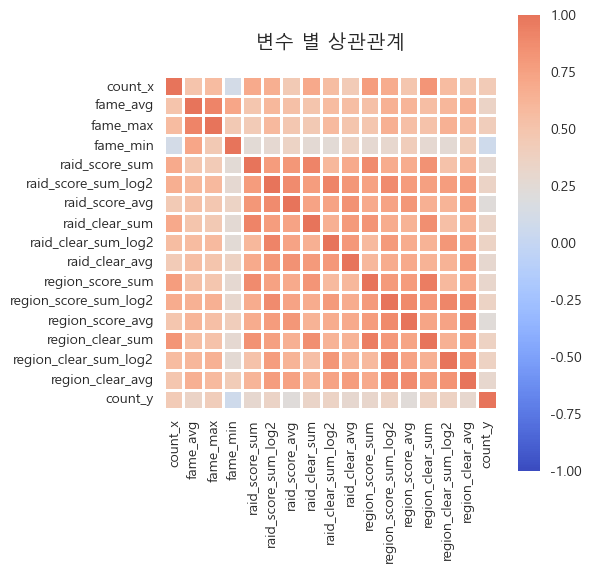

In [20]:
plt.subplots(figsize=(6,6))
plt.title('변수 별 상관관계', fontsize=14, pad=20)
sns.heatmap(data=joined.iloc[:,:-1].corr(),
            cmap='coolwarm', vmin=-1, vmax=1, alpha=1, center=0.2,
            linewidths=1, linecolor='white', square=True)
plt.tight_layout()
plt.show()

#### **데이터 스케일링**

* 모든 컨텐츠를 빠지지 않고, 다량의 캐릭터를 키우는 이상치 등을 처리한다.

* 학습에 용이할 수 있도록 데이터를 스케일링한다.

In [21]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

transform_pipeline = Pipeline([
    ('robust', RobustScaler()),
    ('standard', StandardScaler()),
    ('minmax', MinMaxScaler())
])

# X_transformed = transform_pipeline.fit_transform(X)
X,y = np.load('./data/05_x_transformed.npy'), np.load('./data/06_y.npy')

## **3. 모델 학습**

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

#### **시각화 및 결과 출력**

In [23]:
def viz_cm(Y_test, y_pred):
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Purchased', 'Not Purchased'],
                yticklabels=['Purchased', 'Not Purchased'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
def print_result(model, best_params, accuracy, precision, recall, f1):
    model_name = model.__class__.__name__
    print()
    print(f'--- {model_name} ---')
    print(f'Best Parameters: {best_params}')
    print(f'Accuracy: {accuracy:.3f}')
    print(f'Recall: {recall:.3f}')
    print(f'Precision: {precision:.3f}')
    print(f'F1 Score: {f1:.3f}')

def run_clf(model, param_grid, cv, X_train, X_test, Y_train, Y_test):
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1', verbose=2)
    
    try:
        grid_search.fit(X_train, Y_train)
    except AttributeError: 
        grid_search.fit(X_train, Y_train.values.ravel())

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred, zero_division=0)
    precision = precision_score(Y_test, y_pred, zero_division=0)
    f1 = f1_score(Y_test, y_pred, zero_division=0)

    print_result(best_model, best_params, accuracy, precision, recall, f1)
    viz_cm(Y_test, y_pred)
    
    return best_model, best_params

### **1. XGBoost**

#### **바닐라 XGBoost**

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.5s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.4s

--- XGBClassifier ---
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.813
Recall: 0.301
Precision: 0.565
F1 Score: 0.393


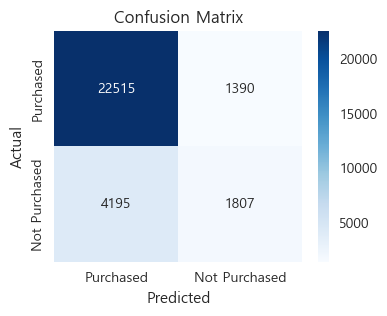

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

xgb_model = XGBClassifier(
    eval_metric='logloss'
)

param_grid = {
    'learning_rate': [0.05],
    'max_depth': [5],
    'n_estimators': [500],
    'subsample': [0.8],
}
xgb_vanilla, xgb_vanilla_params = run_clf(xgb_model, param_grid, 5, X_train, X_test, y_train, y_test)

* 데이터 클래스가 불균형해서 전체적으로 낮은 지표를 보인다.

* 데이터 클래스 불균형을 해결하기 위해 클래스 가중치 균형을 맞춰주자.

#### **클래스 가중치 개선**

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.7s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.6s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.7s

--- XGBClassifier ---
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.731
Recall: 0.890
Precision: 0.414
F1 Score: 0.566


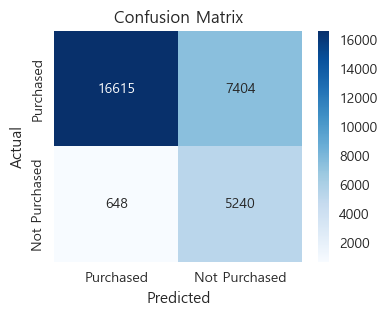

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

scale_pos_weight = sum(y_train==0) / sum(y_train==1)
xgb_model = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
    )

param_grid = {
    'learning_rate': [0.05],
    'max_depth': [5],
    'n_estimators': [500],
    'subsample': [0.8],
}
xgb_weight, xgb_weight_params = run_clf(xgb_model, param_grid, 5, X_train, X_test, y_train, y_test)

* ACC 지표는 낮아졌지만, 전체적으로 F1 Score가 많이 상승한 것을 확인할 수 있다.
  
* Recall과 Precision의 굉장히 차이나는 것을 확인할 수 있다.

* 원본 데이터에 SMOTE를 통해서 데이터 불균형을 해결하고 학습 성능을 향상시킨다.

#### **SMOTE를 통한 Over Sampling**

In [26]:
from imblearn.over_sampling import SMOTE

X,y = np.load('./data/05_x_transformed.npy'), np.load('./data/06_y.npy')

smote = SMOTE(sampling_strategy=1, random_state=42)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   3.9s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   4.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=500, subsample=0.8; total time=   4.1s

--- XGBClassifier ---
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Accuracy: 0.832
Recall: 0.874
Precision: 0.806
F1 Score: 0.839


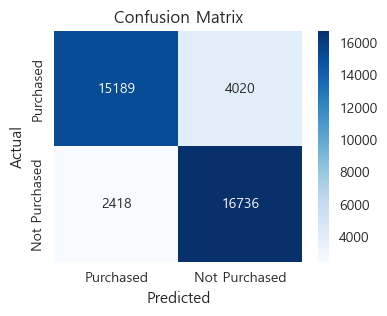

In [27]:
X_resampled, y_resampled = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scale_pos_weight = sum(y_train==0) / sum(y_train==1)
xgb_model = XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
    )

param_grid = {
    'learning_rate': [0.05],
    'max_depth': [5],
    'n_estimators': [500],
    'subsample': [0.8],
}
xgb_smote, xgb_smote_params = run_clf(xgb_model, param_grid, 5, X_train, X_test, y_train, y_test)

* 초기 모델에 비해 F1 Score가 0.5정도 상승하며 준수한 성능을 보이고있다.

* training, validation loss를 통해 over fitting이 발생하는지 확인한다.

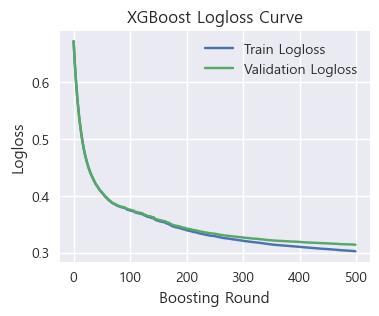

In [28]:
eval_set = [(X_train, y_train), (X_test, y_test)]

xgb_smote.fit(X_train, y_train,
              eval_set=eval_set,
              verbose=False)
results = xgb_smote.evals_result()

plt.figure(figsize=(4,3))
plt.plot(results['validation_0']['logloss'], label='Train Logloss')
plt.plot(results['validation_1']['logloss'], label='Validation Logloss')
plt.xlabel('Boosting Round')
plt.ylabel('Logloss')
plt.title('XGBoost Logloss Curve')
plt.legend()
plt.show()

* 500 epoch까지 validation loss가 꾸준히 감소하는 것을 확인할 수 있다.

* feature engineering을 통해, over fitting이 가능성이 낮은 모델을 찾는다.

### **2. Feature Engineering**

#### **Grid Search**

In [29]:
X_temp, X_test, y_temp, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

scale_pos_weight = sum(y_train==0) / sum(y_train==1)
xgb_model = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

param_grid = {'learning_rate': [0.05],
              'max_depth': [7],
              'n_estimators': [500],
              'reg_alpha': [0.1],
              'reg_lambda': [0.1],
              'subsample': [0.7]}
# param_grid = {
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [300, 500],
#     'subsample': [0.7, 0.8],
#     'reg_alpha': [0.1],
#     'reg_lambda': [0.1]
# }

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=0,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [7],
                         'n_estimators': [500], 'reg_alpha': [0.1],
                         'reg_lambda': [0.1], 'subsample': [0.7]},
             scoring='f1')

#### **Train/Validation**

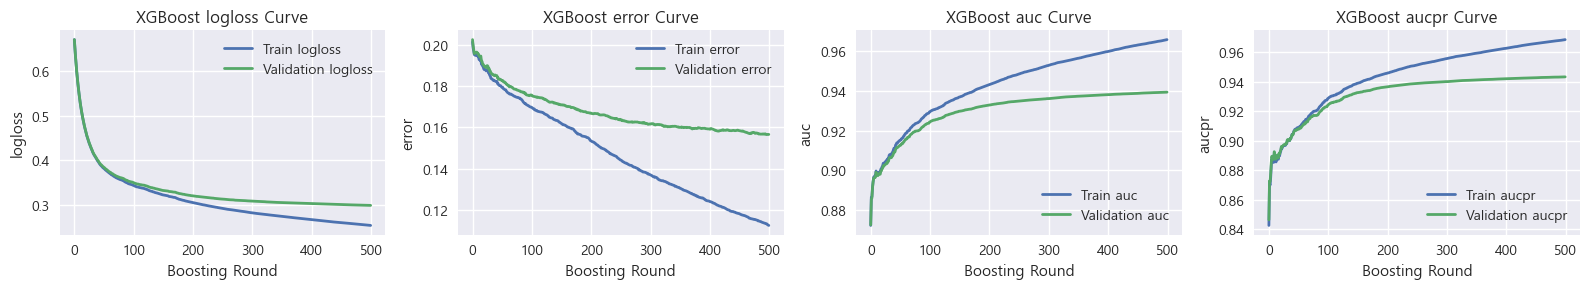

In [30]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

eval_set = [(X_train, y_train), (X_val, y_val)]
best_model.set_params(eval_metric=['logloss', 'error', 'auc', 'aucpr'])
best_model.fit(X_train, y_train,
              eval_set=eval_set,
              verbose=False)

results = best_model.evals_result()

metrics = ['logloss', 'error', 'auc', 'aucpr']
fig, ax = plt.subplots(1, len(metrics), figsize=(16,3))

for i, metric in enumerate(metrics):
    ax[i].plot(results['validation_0'][metric], label=f'Train {metric}', linewidth=2)
    ax[i].plot(results['validation_1'][metric], label=f'Validation {metric}', linewidth=2)
    ax[i].set_title(f'XGBoost {metric} Curve')
    ax[i].set_xlabel('Boosting Round')
    ax[i].set_ylabel(metric)
    ax[i].legend()

plt.tight_layout()
plt.show()


--- XGBoost Results ---
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.7}
Accuracy: 0.843
Recall: 0.872
Precision: 0.827
F1 Score: 0.849


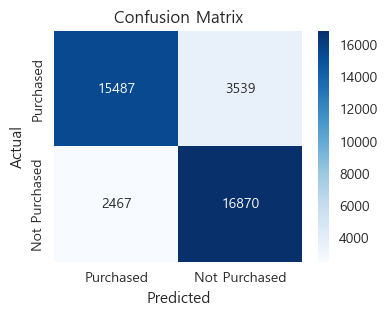

In [31]:
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("\n--- XGBoost Results ---")
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')
print(f'F1 Score: {f1:.3f}')

plt.figure(figsize=(4,3))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Purchased', 'Not Purchased'],
            yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Train/Test**

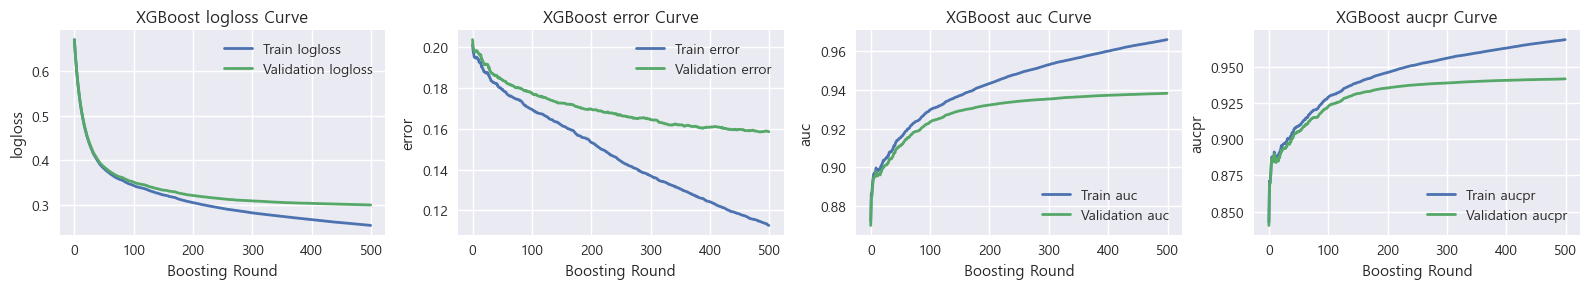

In [32]:
eval_set = [(X_train, y_train), (X_test, y_test)]
best_model.set_params(eval_metric=['logloss', 'error', 'auc', 'aucpr'])
best_model.fit(X_train, y_train,
              eval_set=eval_set,
              verbose=False)

results = best_model.evals_result()

metrics = ['logloss', 'error', 'auc', 'aucpr']
fig, ax = plt.subplots(1, len(metrics), figsize=(16,3))

for i, metric in enumerate(metrics):
    ax[i].plot(results['validation_0'][metric], label=f'Train {metric}', linewidth=2)
    ax[i].plot(results['validation_1'][metric], label=f'Validation {metric}', linewidth=2)
    ax[i].set_title(f'XGBoost {metric} Curve')
    ax[i].set_xlabel('Boosting Round')
    ax[i].set_ylabel(metric)
    ax[i].legend()

plt.tight_layout()
plt.show()


--- XGBoost Results ---
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 500, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.7}
Accuracy: 0.841
Recall: 0.871
Precision: 0.822
F1 Score: 0.846


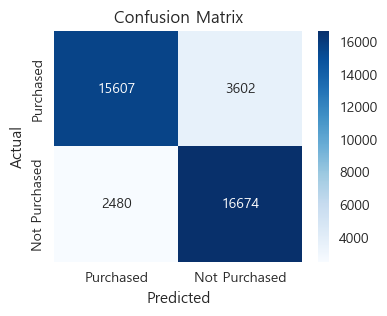

In [33]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- XGBoost Results ---")
print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy:.3f}')
print(f'Recall: {recall:.3f}')
print(f'Precision: {precision:.3f}')
print(f'F1 Score: {f1:.3f}')

plt.figure(figsize=(4,3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Purchased', 'Not Purchased'],
            yticklabels=['Purchased', 'Not Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### **Feature Importance**

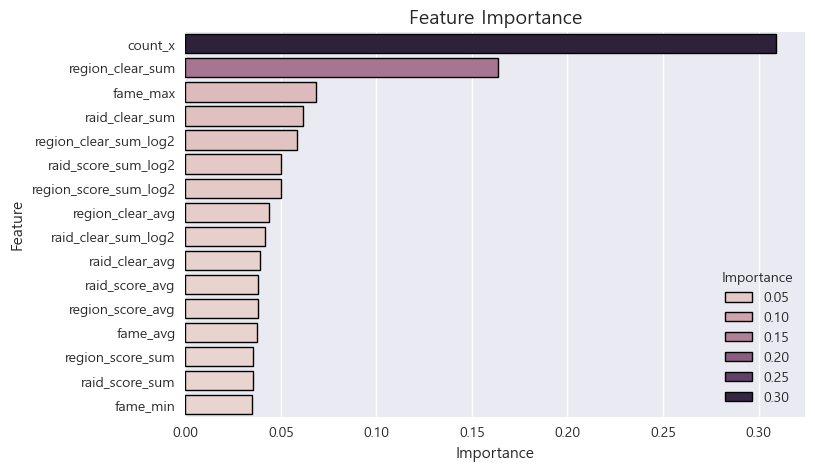

In [34]:
feature_importances = pd.DataFrame({
    'Feature': joined.columns[:-1],
    'temp': best_model.feature_importances_
})

feature_importances['Importance'] = feature_importances['temp'] * (1/0.275018)
feature_importances.iloc[:-1,:].sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_importances.iloc[:-1,:].sort_values(by='Importance', ascending=False),
    x='Importance', y='Feature', hue='Importance',
    width=0.8, edgecolor='black', linewidth=1,
)
plt.title('Feature Importance', fontsize=14)
plt.show()

## **4. 고객 클러스터링**

In [35]:
# datas = pd.read_csv('./data/04_raw_data.csv')

# transform_pipeline = Pipeline([
#     ('robust', RobustScaler()),
#     ('standard', StandardScaler()),
#     ('minmax', MinMaxScaler())
# ])

# X = transform_pipeline.fit_transform(datas.iloc[:,:-1])
# datas['buy_pred'] = best_model.predict(X)
# datas['buy_prob'] = best_model.predict_proba(X)[:,1]

datas = pd.read_csv('./data/09_result_data.csv')
datas

,count_x,fame_avg,fame_max,fame_min,raid_score_sum,raid_score_sum_log2,raid_score_avg,raid_clear_sum,raid_clear_sum_log2,raid_clear_avg,region_score_sum,region_score_sum_log2,region_score_avg,region_clear_sum,region_clear_sum_log2,region_clear_avg,count_y,buy,buy_pred,buy_prob
0,9,56567.222222,58319,53477,46.00,3.850148,5.111111,668893.0,13.413381,74321.444444,5.50,1.871802,0.611111,376832.0,12.839557,41870.222222,0.0,0,0,0.000054
1,1,56747.000000,56747,56747,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0.000093
2,1,50308.000000,50308,50308,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0.000110
3,10,59002.000000,64777,50544,23.00,3.178054,2.300000,1506816.0,14.225510,150681.600000,11.75,2.545531,1.175000,1145856.0,13.951663,114585.600000,0.0,0,0,0.000079
4,5,59971.400000,61687,58371,14.25,2.724580,2.850000,970752.0,13.785827,194150.400000,2.00,1.098612,0.400000,491520.0,13.105260,98304.000000,1.0,0,0,0.422770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119620,30,61260.133333,64322,52150,342.50,5.839187,11.416667,6850495.0,15.739832,228349.833333,261.25,5.569298,8.708333,6389636.0,15.670188,212987.866667,2.0,1,1,0.906792
119621,20,62115.850000,65069,55623,125.25,4.838264,6.262500,2915198.0,14.885449,145759.900000,163.00,5.099866,8.150000,3243989.0,14.992315,162199.450000,2.0,0,1,0.657913
119622,10,60885.800000,64251,56115,68.00,4.234107,6.800000,1078201.0,13.890805,107820.100000,67.00,4.219508,6.700000,1177081.0,13.978549,117708.100000,2.0,0,1,0.529236
119623,1,53789.000000,53789,53789,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0,0,0.000143


#### **패키지 구매 확률 데이터 분포**

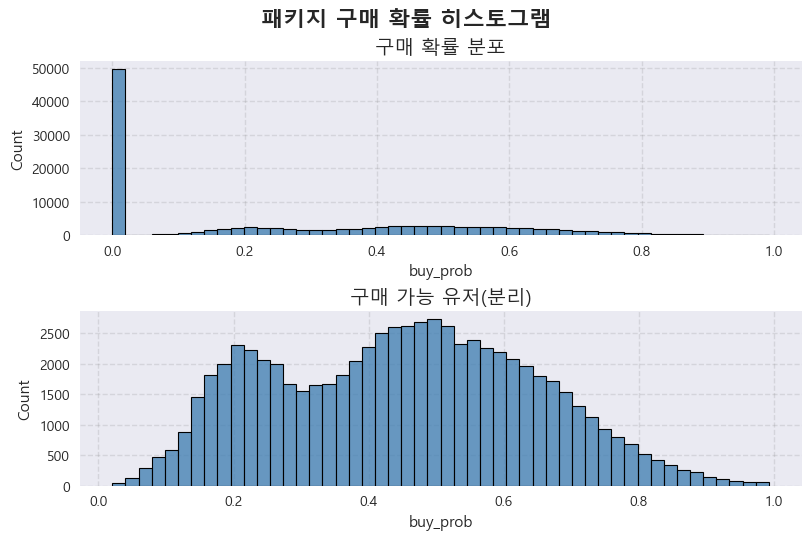

In [36]:
fig, ax = plt.subplots(2,1,figsize=(8,5), constrained_layout=True)

sns.histplot(
    data=datas, x='buy_prob', bins=50,
    multiple='stack', color='steelblue', alpha=0.8,
    edgecolor='black', linewidth=0.8, legend=False, ax=ax[0]
)
ax[0].set_title('구매 확률 분포', fontsize=14)
ax[0].grid(True, alpha=0.2, color='gray', linestyle='--')

sns.histplot(
    data=datas[datas['buy_prob'] >= 0.01], x='buy_prob', bins=50,
    multiple='stack', color='steelblue', alpha=0.8,
    edgecolor='black', linewidth=0.8, legend=False, ax=ax[1]
)
ax[1].set_title('구매 가능 유저(분리)', fontsize=14)
ax[1].grid(True, alpha=0.2, color='gray', linestyle='--')

fig.suptitle('패키지 구매 확률 히스토그램', fontsize=16, fontweight='bold', y=1.05)
plt.show()

* 구매 가능성이 없는 유저들이 대부분이기 때문에, 이 유저들은 따로 구분한다.

* 구매 가능성이 없는 유저를 제외하면 확률 분포가 양봉형인 것을 알 수 있다.

#### **K Means 클러스터링**

In [37]:
from sklearn.cluster import KMeans
test_labels = ['count_x',
                'raid_score_sum','raid_score_sum_log2', 'raid_score_avg',
               'raid_clear_sum','raid_clear_sum_log2', 'raid_clear_avg',
              'region_score_sum','region_score_sum_log2', 'region_score_avg',
              'region_clear_sum', 'region_clear_sum_log2', 'region_clear_avg']
X = datas[test_labels]

kmeans = KMeans(n_clusters=4, random_state=42)
datas['cluster'] = kmeans.fit_predict(X)

# cluster_centers = kmeans.cluster_centers_

# cluster_stats = datas.groupby('cluster')[test_labels].mean().reset_index()
# cluster_stats.sort_values('buy_prob')

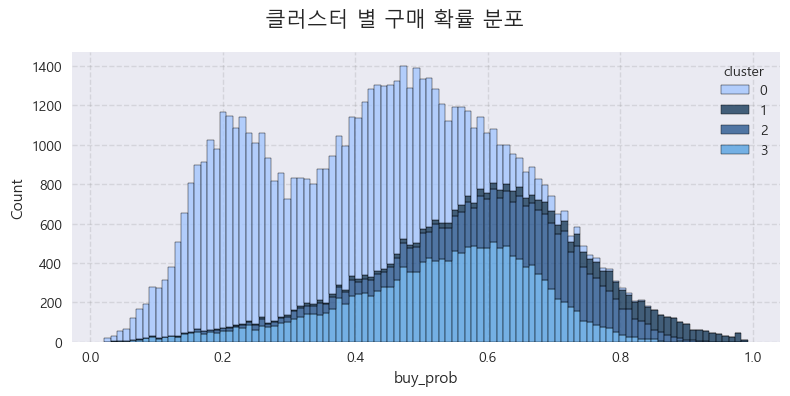

In [38]:
from seaborn import saturate
custom_palette = {0: '#A0C4FF', 3: '#4D9DE0', 2: '#1D4E89', 1: '#0A2F51'}

fig,ax= plt.subplots(figsize=(8,4))
fig.suptitle('클러스터 별 구매 확률 분포', fontsize=15)

sns.histplot(
    data=datas[datas['buy_prob']>0.01], x='buy_prob', bins=100,
    hue='cluster', multiple='stack', palette=custom_palette,
    edgecolor='black', linewidth=0.3, ax=ax
)

plt.tight_layout()
plt.grid(True, alpha=0.2, color='gray', linestyle='--')
plt.show()

In [39]:
datas[datas['buy_prob']>=0.01][['count_x', 'count_y', 'fame_avg', 'fame_max', 'fame_min',
                                'raid_score_sum', 'raid_score_sum_log2', 'raid_score_avg',
                                'raid_clear_sum', 'raid_clear_sum_log2', 'raid_clear_avg',
                                'region_score_sum', 'region_score_sum_log2', 'region_score_avg',
                                'region_clear_sum', 'region_clear_sum_log2', 'region_clear_avg',
                                'buy', 'buy_pred', 'buy_prob', 'cluster']].groupby('cluster').mean().reset_index().sort_values('buy_prob')

,cluster,count_x,count_y,fame_avg,fame_max,fame_min,raid_score_sum,raid_score_sum_log2,raid_score_avg,raid_clear_sum,...,raid_clear_avg,region_score_sum,region_score_sum_log2,region_score_avg,region_clear_sum,region_clear_sum_log2,region_clear_avg,buy,buy_pred,buy_prob
0,0,5.272220,1.562636,57391.079196,60060.223089,54395.838831,4.168817,0.743311,0.759836,8.760422e+04,...,18808.840393,6.656188,0.968518,1.232807,1.551452e+05,5.308186,32805.490265,0.240668,0.183661,0.352340
3,3,10.480916,1.697946,60886.709764,64052.976603,55874.876745,38.215928,3.206759,4.233830,9.368101e+05,...,106907.686674,62.666977,3.871099,6.454804,1.529195e+06,14.120791,158024.105492,0.428164,0.630857,0.528613
2,2,15.886052,1.791862,62240.290209,64886.909918,57118.695031,114.172682,4.572982,7.807943,2.557773e+06,...,175132.476920,150.017312,4.921400,9.866025,3.127641e+06,14.914577,203626.662128,0.507140,0.820716,0.622977
1,1,25.874567,1.898204,62682.874792,65118.975102,57672.241097,244.309880,5.393846,9.857591,5.121799e+06,...,206059.845299,289.341869,5.611187,11.453996,5.656886e+06,15.514895,222194.092810,0.594390,0.883391,0.727792


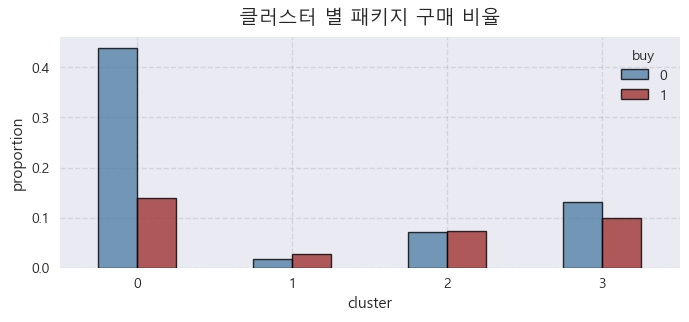

In [40]:
cluster_info = datas[datas['buy_prob']>=0.01][['cluster','buy']].value_counts(normalize=True).reset_index()

plt.figure(figsize=(8,3))
sns.barplot(
    data=cluster_info, x='cluster', y='proportion',
    hue='buy', palette=colors, alpha=0.8,
    width=0.5, edgecolor='black', linewidth=1,
)
plt.title('클러스터 별 패키지 구매 비율', fontsize=14, y=1.02)
plt.grid(True, alpha=0.2, color='gray', linestyle='--')
plt.show()

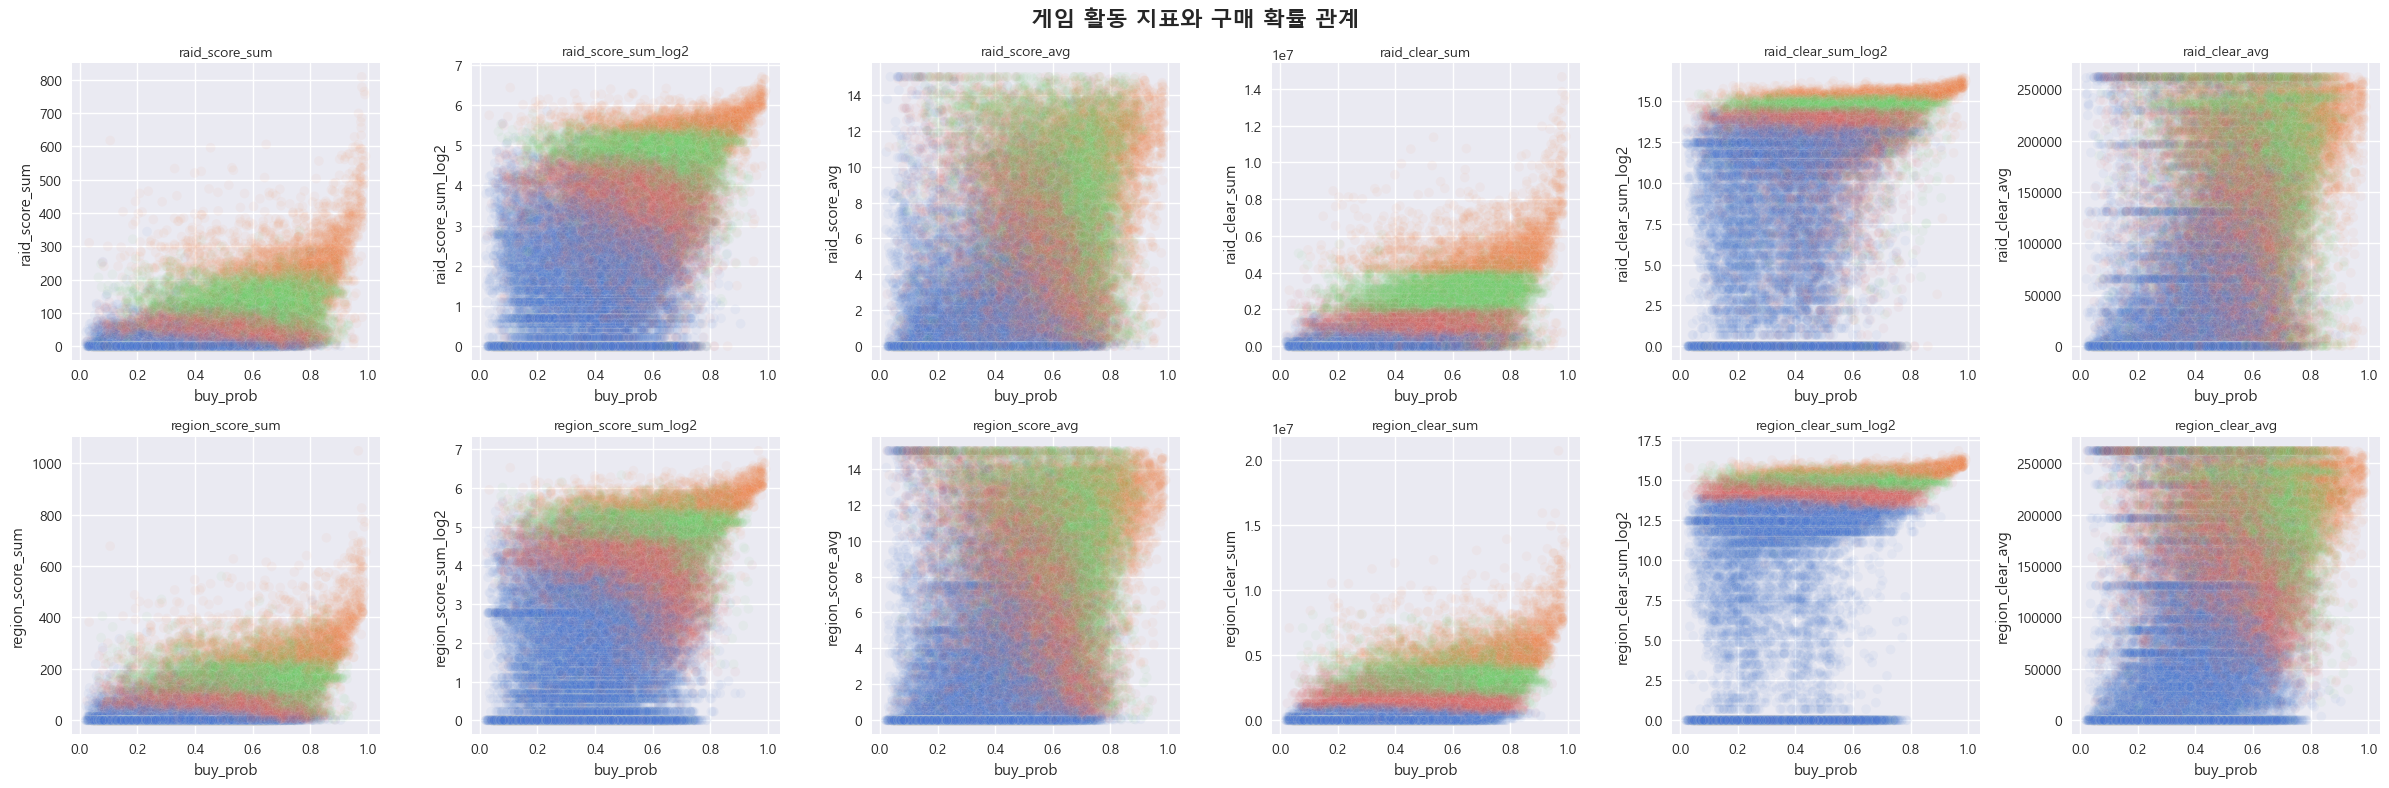

In [41]:
raid_metrics = ['raid_score_sum', 'raid_score_sum_log2', 'raid_score_avg',
                'raid_clear_sum', 'raid_clear_sum_log2', 'raid_clear_avg']
region_metrics = ['region_score_sum', 'region_score_sum_log2', 'region_score_avg',
                 'region_clear_sum', 'region_clear_sum_log2', 'region_clear_avg']

fig, axes = plt.subplots(2,6,figsize=(24,8))
fig.suptitle('게임 활동 지표와 구매 확률 관계', fontsize=16, fontweight='bold')

for row,metrics in enumerate([raid_metrics,region_metrics]):
    for col, metric in enumerate(metrics):
        sns.scatterplot(
            data=datas[datas['buy_prob']>=0.01], x='buy_prob', y=metric,
            hue='cluster', alpha=0.05, palette='muted',
            legend=False, ax=axes[row,col]
            )
        axes[row,col].set_title(metric, fontsize=10)

plt.tight_layout()
plt.show()

* 이탈 유저들을 제외하고, 구매 가능성이 있는 약 7만 명의 유저 분석 결과를 확인한다.

* sum이 들어간 지표들에서는, 각 클러스터가 수평으로 나뉘는 것을 확인할 수 있다.
  
  * 지표 합이 특정 임계값을 넘기기 위해서는 캐릭터의 절대적인 수가 중요하다.

## **5. 인사이트 도출 및 액션플랜**

### **1. 인사이트**
1. 액티브 캐릭터 수
   
   * 지속적으로 플레이하는 유저들의 경우, 구매 가능성이 높다.

2. 레기온 클리어 캐릭터 합계

   * 2, 4번째로 레기온 clear 지표의 합이 중요하다.
   * 레이드보다 최근 컨텐츠인 레기온 지표의 영향이 더 크다.
  
3. 캐릭터의 명성 최댓값
   
   * 캐릭터의 명성에 핵심 BM 및 추가 BM 상품들이 다수 포함되어있어, 해당 유저의 구매력을 간접적으로 측정할 수 있다.

#### **Cluster 0**

  * 구매 확률의 평균이 약 35%이며, 구매 가능 인구의 약 58%를 차지한다.
  
  1. 기존 캐릭터와 신규 캐릭터 수의 평균이 다른 집단보다 현저히 낮은 것을 확인할 수 있다.

      * 신규 직업 이벤트 이후 신규 캐릭터 이벤트까지 효과적으로 이어지지 않은 것을 추측할 수 있다.
     
      * 이는 3개 이상의 신규 캐릭터 이벤트를 진행할 수 없는 기술적 문제도 있는 부분이라, 추후 이벤트에서는 개선을 기대할 수 있다.
  
  2. 최대 명성이 현저히 낮다.  
   
     * active 기준을 충족했음에도 불구하고, 대부분의 유저들이 이탈한 것으로 생각할 수 있다.

     * 다캐릭터를 요구하는 게임의 특성상 캐릭터를 확장하면서 소모하는 비용이 요구되는데 이벤트가 없으면 캐릭터 확장이 어렵다.

<br>

#### **Cluster 3**
  
  * 구매 확률의 평균이 약 52%이며, 구매 가능 인구의 약 23%를 차지한다.

  1. 구매 확률이 더 높은 Cluster 1,2와 캐릭터 수와 명성에 갭이 존재한다.

     * 라이트하게 플레이하는 유저들이 가장 많고, 대부분 1버프교환 단위라고 불리는 4개 이하의 캐릭터들을 육성한다.

  2. 핵심 BM 아이템 미보유 가능성 높음
     * 오라 아바타, 칭호, 크리처 등 메인 BM 상품과 증폭, 마법부여의 부가 스펙업 요소를 등을 전부 구매하지 않는 것으로 예상된다.
  
<br>

#### **Cluster 2,1**
  
  * 구매 확률의 평균이 약 62%와 72%이며, 구매 가능 인구의 약 19%를 차지한다.
  
  1. 두 그룹간의 차이는 있지만, 다수의 캐릭터들을 플레이하는 것을을 확인할 수 있다.
   
     * 레이드의 경우 평균 8개 이상, 레기온의 경우 평균 10개 이상에 달하는 지표를 확인 가능하다.
  
  2. 핵심 BM 아이템 전부 보유 가능성 높음
      * 명성을 통해서 해당 유저들이 핵심 BM 아이템을 대부분 구매했을 것을 유추할 수 있다.


### **2. 액션 플랜**

1️. 상황에 맞는 아라드 패스 구성 물품 선택지 추가

- **클러스터 별 필요로 하는 물품들이 다르므로**, 특정 단계에서 패스 물품을 선택할 수 있게 변경하거나 패스의 **구성 자체를 추가 제시하여 선택의 폭을 넓힌다**.
- Cluster 0과 Cluster 3의 경우 **메인 컨텐츠 진입 및 캐릭터 확장을 위한 계정 귀속 선택 아이템 지급량 확대.**
- Cluster 1과 Cluster 2의 경우 **증폭 및 강화 등 추가 BM 및 재화 소모를 유도하는 아이템 지급.**

2️. 세라샵, 경매장 UX 개선 및 아이템 툴팁 개선

- 신규, 복귀 유저의 경우 지난 시즌의 BM들을 잘못 구매하는 등의 문제점이 발생한다.
- 칭호, 오라, 크리처 등 **핵심 BM의 경우 추천 태그 또는 유저들이 자주 선택하는 아이템 등을 노출시킨다.**
- 신규, 복귀 유저의 경우 번들 패키지를 할인된 가격으로 판매.

3️. 최신 컨텐츠 클리어 보상 강화

- 컨텐츠 소모량이 적은 Cluster 0와 Cluster3이 빠르게 **캐릭터를 확장할 수 있도록 계정귀속 보상 강화.**
- Cluster 0의 이탈 방지를 위해 주간 컨텐츠 연속 클리어 보상 지급 강화.